In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


from countries import get_country_list

# Land Cover
Data about land cover of several OECD and non OECD countries (https://stats.oecd.org/Index.aspx?DataSetCode=LAND_COVER#)

## Data Specifications
The obtained data set contains several variables about the land cover of given countries. The values are stored as relative numbers to the total area and as absolute numbers in square kilometers. The data is recorded for the years 1992, 2004, 2015 and 2018. We want to investigate whether we can use the latest record as an approximation of the 2020 data, as we expect that the texture of the land does not change significantly over a short period of time.

In [2]:
DATA_PATH = Path('./data')
LAND_COVER = DATA_PATH / 'OECD' / 'LAND_COVER_DATA.csv'
TOTAL_AREA =  DATA_PATH / 'Worldbank' / 'API_AG.SRF.TOTL.K2_DS2_en_csv_v2_1927208.csv'

land_cover = pd.read_csv(LAND_COVER)
land_cover.shape

(17694, 21)

In [3]:
land_cover.head()

,COU,Country,SMALL_SUBNATIONAL_REGION,Small subnational region,LARGE_SUBNATIONAL_REGION,Large subnational region,MEAS,Measure,VARIABLE,Land cover class,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),FOREST,Tree cover,...,1992,NaN,NaN,0,Units,NaN,NaN,911.890687,NaN,NaN
1,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),FOREST,Tree cover,...,2004,NaN,NaN,0,Units,NaN,NaN,890.559607,NaN,NaN
2,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),FOREST,Tree cover,...,2015,NaN,NaN,0,Units,NaN,NaN,896.524077,NaN,NaN
3,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),FOREST,Tree cover,...,2018,NaN,NaN,0,Units,NaN,NaN,904.706598,NaN,NaN
4,AUS,Australia,TOTAL,Total,TOTAL,Total,THOUSAND_SQKM,Square kilometers (000's),GRSL,Grassland,...,1992,NaN,NaN,0,Units,NaN,NaN,1205.405426,NaN,NaN


In [4]:
#number of unique values per column
land_cover.nunique()

COU                           246
Country                       246
SMALL_SUBNATIONAL_REGION        1
Small subnational region        1
LARGE_SUBNATIONAL_REGION        1
Large subnational region        1
MEAS                            2
Measure                         2
VARIABLE                        9
Land cover class                9
YEA                             4
Year                            4
Unit Code                       0
Unit                            0
PowerCode Code                  1
PowerCode                       1
Reference Period Code           0
Reference Period                0
Value                       12556
Flag Codes                      0
Flags                           0
dtype: int64

In [5]:
#for our analysis we use the relative data, to make it comparable across countries of different sizes
land_cover_rel = land_cover.copy()
land_cover_rel = land_cover_rel[land_cover_rel['MEAS'] == 'PCNT']
land_cover_rel.shape

(8838, 21)

In [6]:
#we look at the unique countries (246 as shown before) in our new data frame 
land_cover_rel.Country.unique()

array(['Australia', 'Belgium', 'Canada', 'Czech Republic', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Argentina', 'Aruba', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cabo Verde', 'Cayman Islands', 'Chad',
       "China (People's Republic of)", 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominica

In [7]:
#There are several entries that summarize a number of countries, which we remove
remove = ['OECD - Total','European Union (28 countries)','OECD - Europe','BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa','OECD Asia Oceania','OECD America','Latin America and Caribbean','Middle East and North Africa','G20']
land_cover_rel = land_cover_rel[~land_cover_rel['Country'].isin(remove)]
land_cover_rel.shape

(8514, 21)

In [8]:
#select subset of relevant columns Country, Year, Land cover class and Value
land_cover_rel = land_cover_rel[['Country', 'Year', 'Land cover class', 'Value']]
land_cover_rel.head()

,Country,Year,Land cover class,Value
16,Australia,1992,Artificial surfaces,0.100015
17,Australia,2004,Artificial surfaces,0.136482
18,Australia,2015,Artificial surfaces,0.154930
19,Australia,2018,Artificial surfaces,0.159319
20,Australia,1992,Inland water,0.171305


In [9]:
#list of all land cover attributes
land_cover_rel['Land cover class'].unique()

array(['Artificial surfaces', 'Inland water', 'Bare area', 'Tree cover',
       'Shrubland', 'Sparse vegetation', 'Cropland', 'Wetland',
       'Grassland'], dtype=object)

In [10]:
#no missing values
land_cover_rel.isna().sum()
land_cover_rel

,Country,Year,Land cover class,Value
16,Australia,1992,Artificial surfaces,0.100015
17,Australia,2004,Artificial surfaces,0.136482
18,Australia,2015,Artificial surfaces,0.154930
19,Australia,2018,Artificial surfaces,0.159319
20,Australia,1992,Inland water,0.171305
...,...,...,...,...
17653,Sudan,2004,Cropland,20.276832
17658,Kazakhstan,1992,Inland water,6.825496
17659,Kazakhstan,2004,Inland water,6.486520
17660,Kazakhstan,2015,Inland water,6.214264


In [11]:
#setting year and country as index and our targets as columns
land_cover_rel = land_cover_rel.pivot_table(index=['Country','Year'],columns='Land cover class', values='Value')
land_cover_rel.columns.name = None
land_cover_rel.head()

Artificial surfaces  Bare area   Cropland  Grassland  \
Country     Year                                                         
Afghanistan 1992             0.052857  39.283534  12.584400  36.040998   
            2004             0.081033  39.527342  12.131194  37.041703   
            2015             0.125987  39.126500  12.227564  37.305171   
            2018             0.144171  39.153980  12.120421  37.161205   
Albania     1992             0.607273   1.840586  54.521300   5.444811   

                  Inland water  Shrubland  Sparse vegetation  Tree cover  \
Country     Year                                                           
Afghanistan 1992      0.405237   3.741778           6.647211    1.234941   
            2004      0.105870   3.547692           6.325024    1.229056   
            2015      0.099157   3.545375           6.330105    1.229056   
            2018      0.099181   3.545002           6.528826    1.236130   
Albania     1992      2.193421   3.337453           1.321790   30.452653   

                   Wetland  
Country     Year            
Afghanistan 1992  0.009044  
            2004  0.011085  
            2015  0.011085  
            2018  0.011085  
Albania     1992  0.280713

In [12]:
land_cover_rel.shape

(946, 9)

In [13]:
#descriptive statistics about our attributes
land_cover_rel.describe()

,Artificial surfaces,Bare area,Cropland,Grassland,Inland water,Shrubland,Sparse vegetation,Tree cover,Wetland
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2.755982,12.296451,27.321687,8.841653,5.854319,5.421904,3.055943,33.070767,1.381294
std,9.154760,26.426937,22.535251,15.258184,13.569271,11.064224,6.577833,28.231326,3.682244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093574,0.000000,7.722103,0.098573,0.780424,0.000000,0.007788,5.430741,0.000967
50%,0.375240,0.072102,22.991964,2.734328,1.669853,0.412425,0.144333,30.987333,0.116634
75%,1.551601,4.175463,44.169074,10.908914,4.478559,5.560123,3.180561,57.711595,0.709425
max,100.000000,99.876168,88.623811,88.624788,100.000000,77.445749,46.969990,97.589857,33.226605


In [14]:
#for better visualization, we only plot the values for the countries in our country list 
OECD_COUNTRIES = get_country_list()
land_cover_OECD = land_cover_rel.loc[OECD_COUNTRIES]
land_cover_OECD.shape

(260, 9)

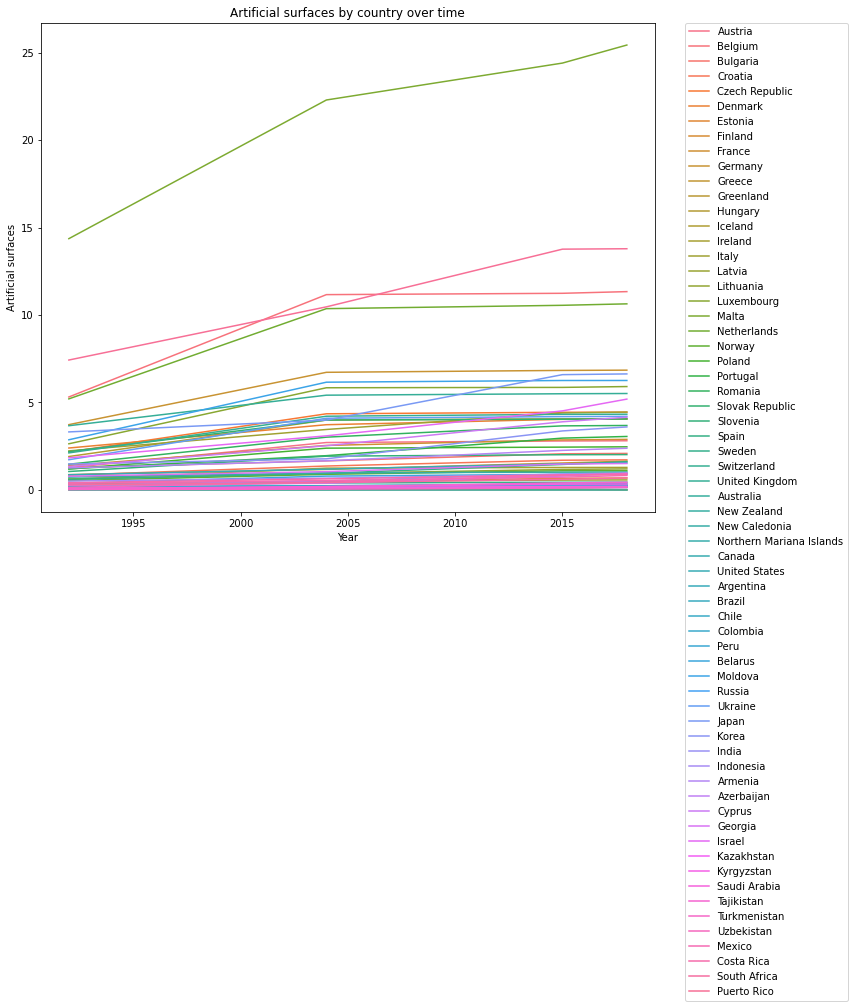

In [15]:
#plot the artifical surfaces over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Artificial surfaces by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Artificial surfaces',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

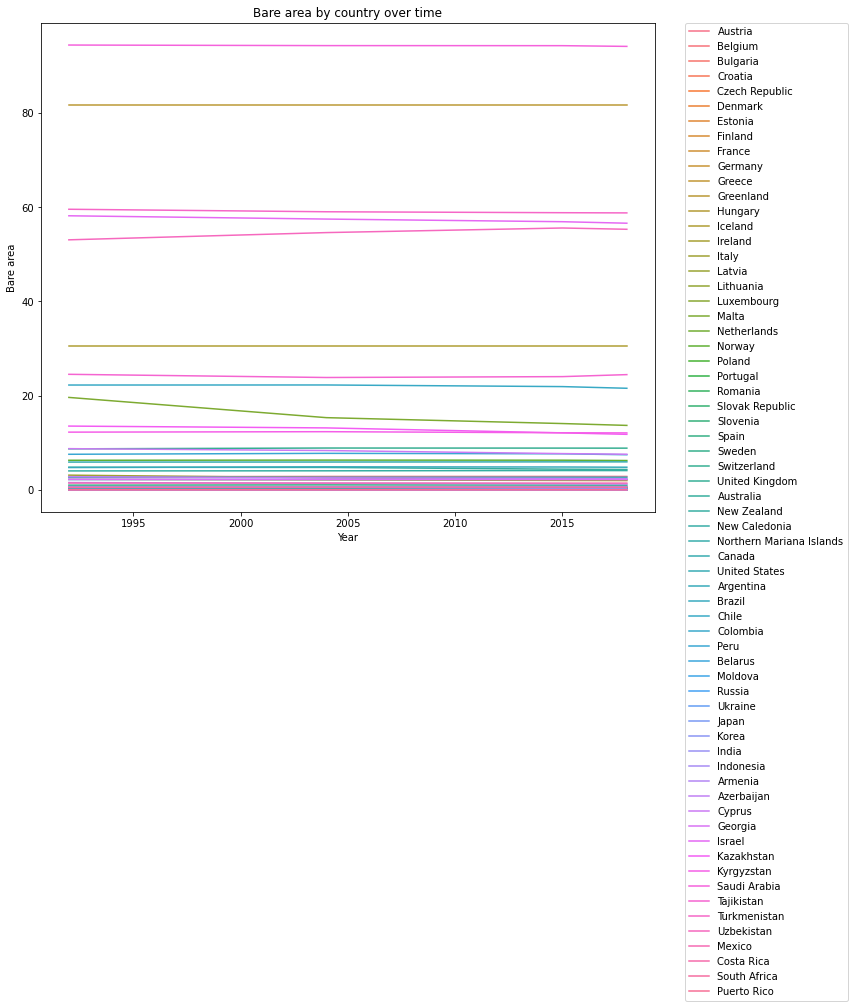

In [16]:
#plot the bare area over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Bare area by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Bare area',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

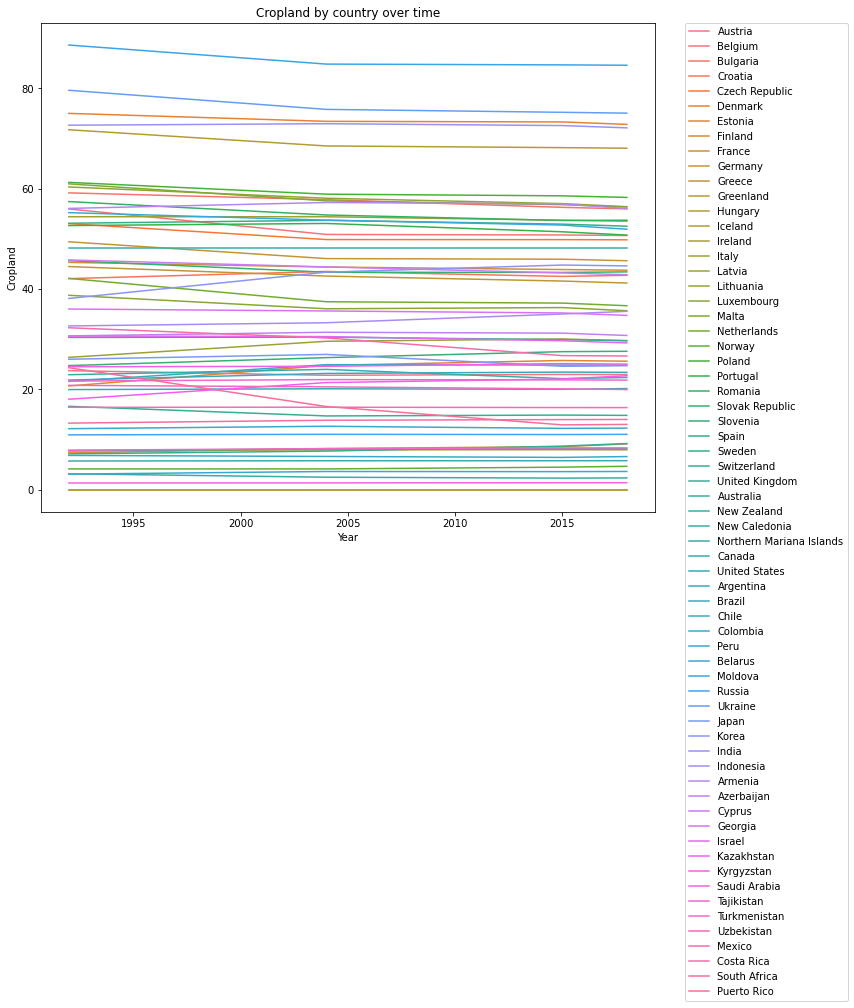

In [17]:
#plot the cropland over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Cropland by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Cropland',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

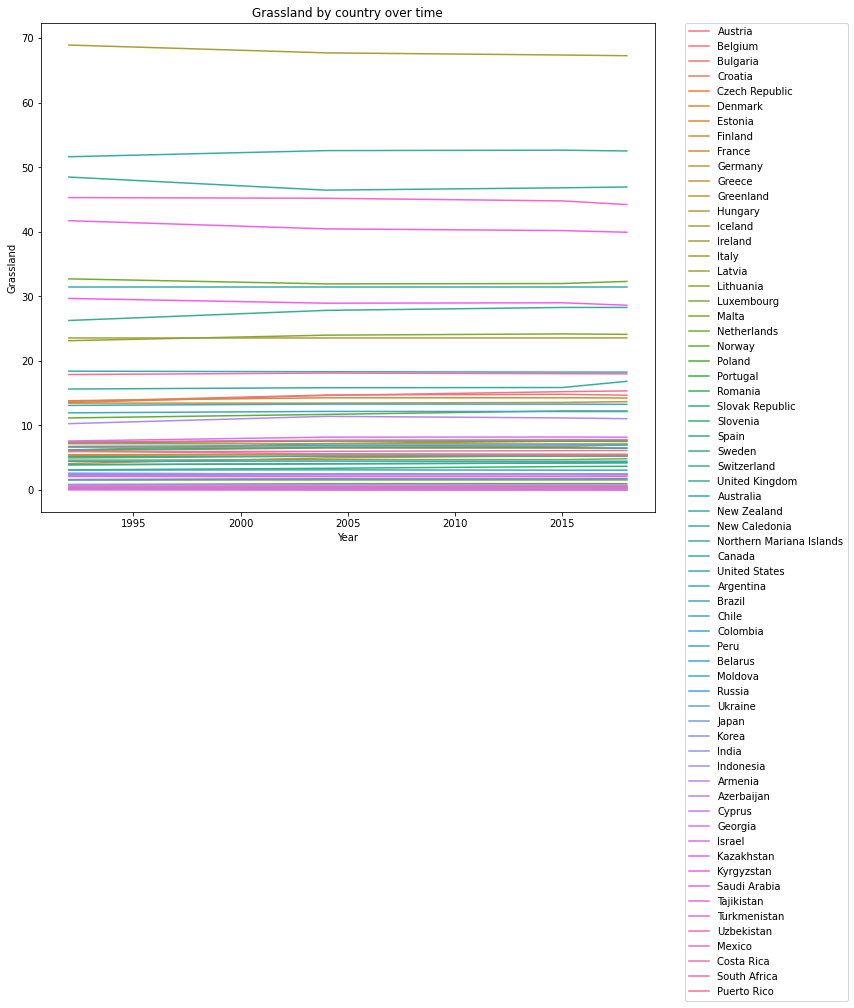

In [18]:
#plot the grassland over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Grassland by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Grassland',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

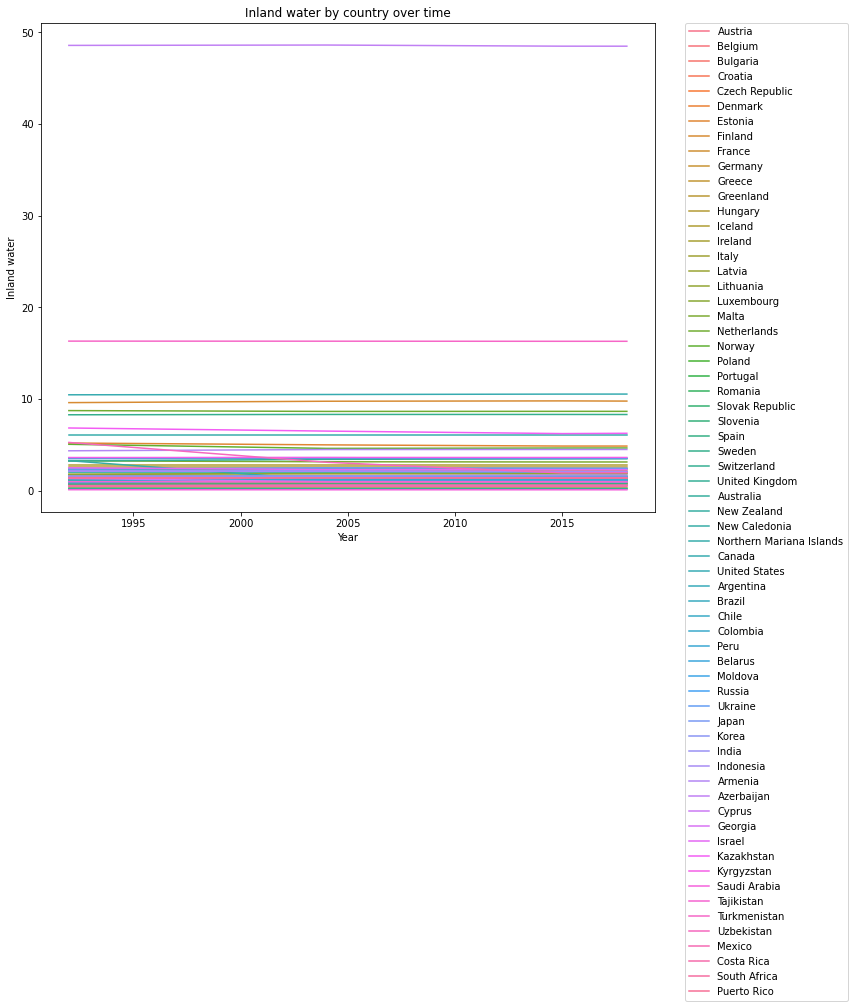

In [19]:
#plot the inland water over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Inland water by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Inland water',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

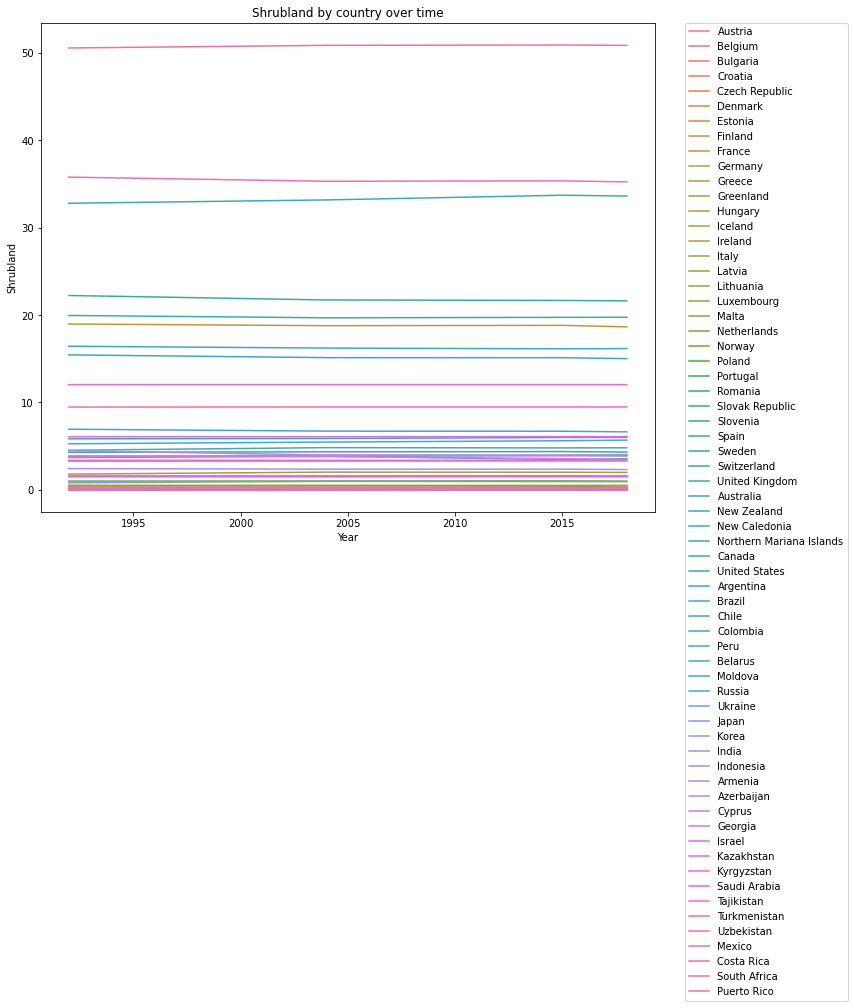

In [20]:
#plot the shrubland over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Shrubland by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Shrubland',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

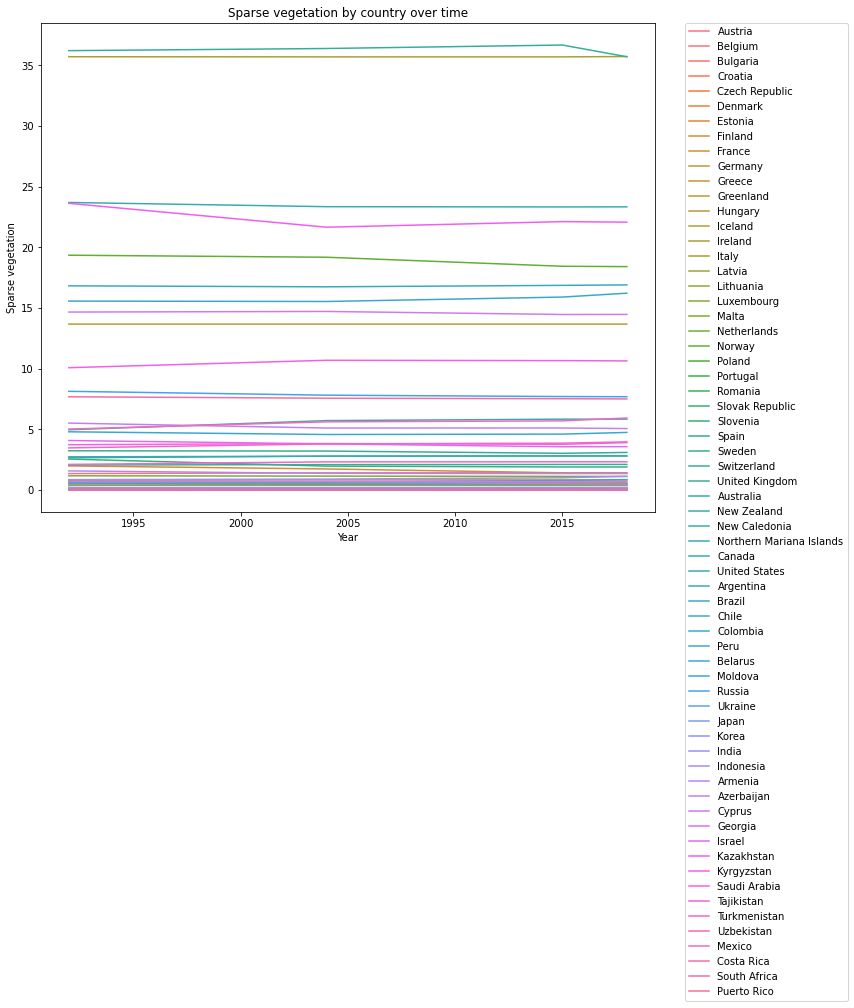

In [21]:
#plot the sparse vegetation over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Sparse vegetation by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Sparse vegetation',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

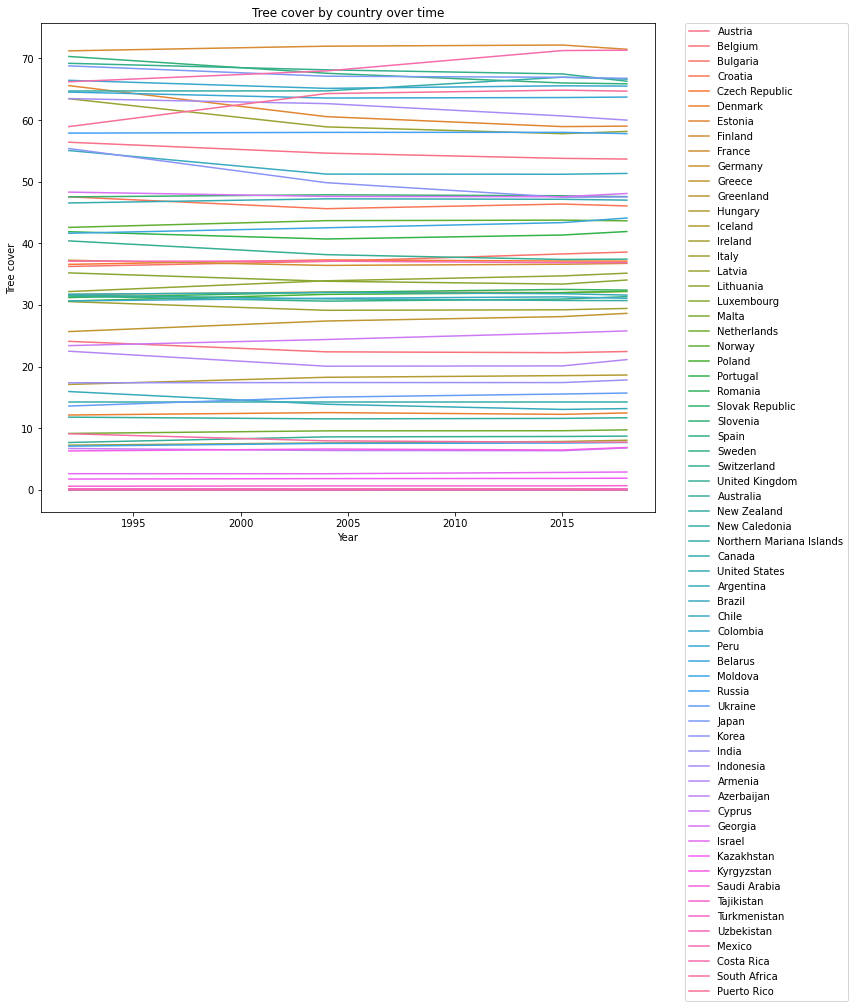

In [22]:
#plot the tree cover over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Tree cover by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Tree cover',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

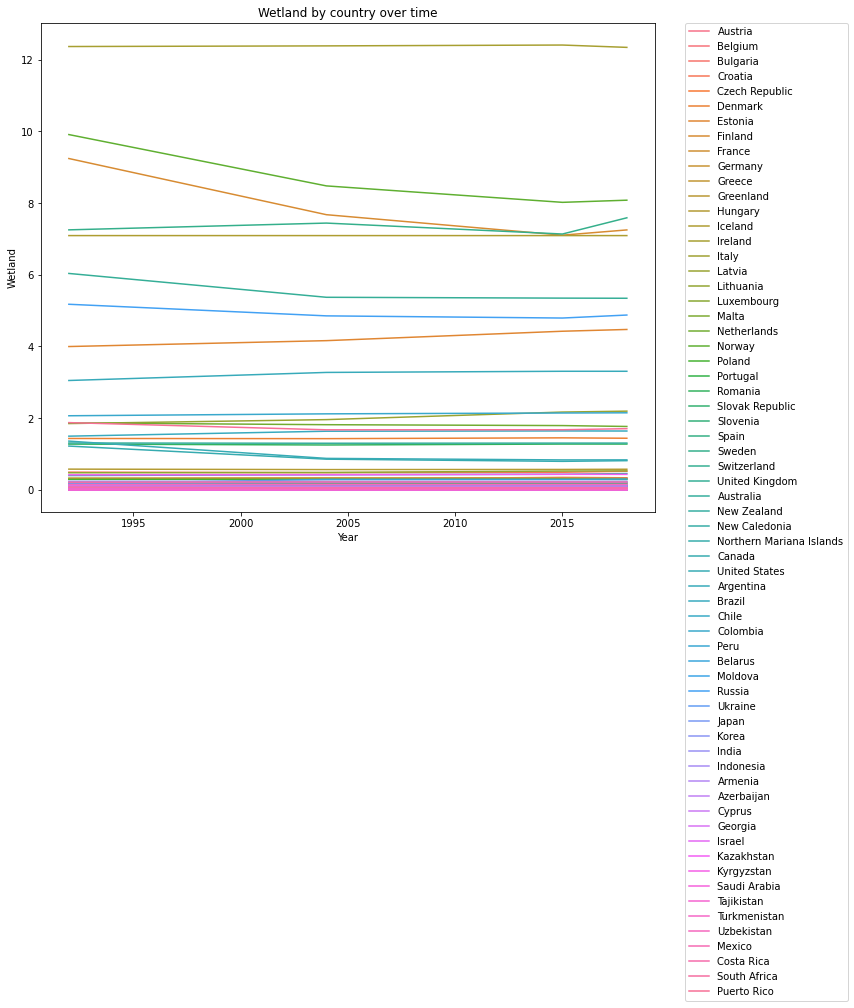

In [23]:
#plot the wetland over years by country
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Wetland by country over time')

sns.lineplot(
    data=land_cover_OECD.reset_index(),
    x='Year',
    y='Wetland',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Conclusions
For the artificial surfaces we can see a major change for our biggest timespan from 1992-2004 in some countries and for a few countries we can see a jump from 2004-2015. However for The shortest timespan from 2015-2018 we can hardly see any markable change across all variables. Excluding artificial surfaces, the data ist quite constant over the whole timespan, as we expected. Especially the ratio 2015/2018 suggests that one can use recent land cover data to approximate the data of the following years, as the properties don't significantly change over a short period of time. However a problem encountered is that for a few countries all entries of some values are 0 over all years. This can suggest that the data just isn't available for that country or that the % of given land cover is actually 0.

In [24]:
#extract our 2018 data
land_cover2018 =   land_cover_rel.iloc[land_cover_rel.index.get_level_values('Year') == 2018]
land_cover2018.shape

(236, 9)

In [25]:
#descriptive statistics
land_cover2018.describe()

,Artificial surfaces,Bare area,Cropland,Grassland,Inland water,Shrubland,Sparse vegetation,Tree cover,Wetland
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,3.274819,12.117159,27.178701,8.833833,5.794420,5.278640,3.060210,33.086850,1.375368
std,9.807513,26.336930,22.388281,15.280070,13.562647,10.848790,6.588589,28.104437,3.655866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.123466,0.000000,7.806774,0.096397,0.799938,0.000000,0.008034,5.868930,0.001665
50%,0.569402,0.072513,23.364426,2.765517,1.674404,0.376116,0.139986,31.230774,0.118505
75%,1.965186,4.094473,43.805507,10.689944,4.474193,5.030730,3.081576,57.213742,0.700044
max,100.000000,99.871986,87.579618,88.624788,100.000000,76.679242,46.950629,97.392105,32.498908


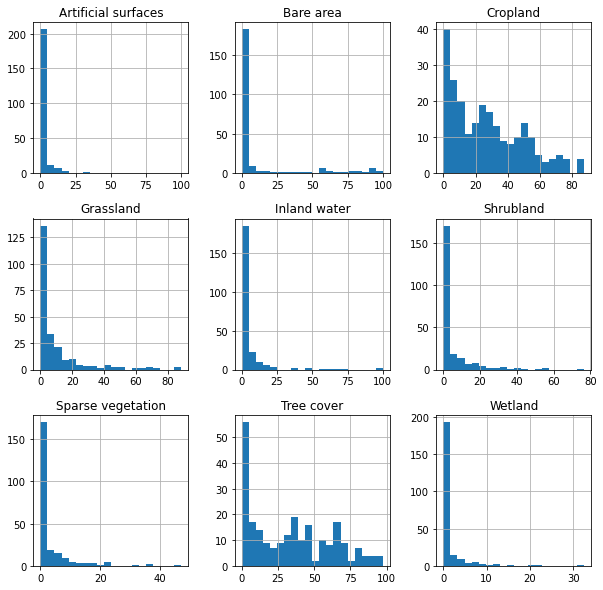

In [26]:
fig, axes = plt.subplots(len(land_cover2018.columns)//3, 3, figsize=(10, 10))

i = 0
for triaxis in axes:
    for axis in triaxis:
        land_cover2018.hist(column = land_cover2018.columns[i], bins = 20, ax=axis)
        i = i+1

In [27]:
land_cover2018.index = land_cover2018.index.droplevel('Year')
land_cover2018.head()

,Artificial surfaces,Bare area,Cropland,Grassland,Inland water,Shrubland,Sparse vegetation,Tree cover,Wetland
Country,,,,,,,,,
Afghanistan,0.144171,39.153980,12.120421,37.161205,0.099181,3.545002,6.528826,1.236130,0.011085
Albania,1.076736,1.682400,48.785857,5.348827,2.259645,3.053523,1.328761,36.185951,0.278300
Algeria,0.123073,89.988986,4.599071,0.003802,0.064360,0.715815,3.637610,0.866315,0.000967
American Samoa,0.038506,0.000000,59.992299,0.000000,4.736234,0.000000,0.077012,35.155949,0.000000
Andorra,0.877637,4.135021,1.012658,23.881857,0.000000,0.033755,10.464135,59.594937,0.000000


To test if the many 0 values are reasonable, we add a column that sums up all the percentages for each country and check if they rouhgly sum up to 1.

In [28]:
land_cover_sum = land_cover2018.copy()
land_cover_sum['Total'] = land_cover_sum.sum(axis=1)
land_cover_sum.head()

,Artificial surfaces,Bare area,Cropland,Grassland,Inland water,Shrubland,Sparse vegetation,Tree cover,Wetland,Total
Country,,,,,,,,,,
Afghanistan,0.144171,39.153980,12.120421,37.161205,0.099181,3.545002,6.528826,1.236130,0.011085,100.0
Albania,1.076736,1.682400,48.785857,5.348827,2.259645,3.053523,1.328761,36.185951,0.278300,100.0
Algeria,0.123073,89.988986,4.599071,0.003802,0.064360,0.715815,3.637610,0.866315,0.000967,100.0
American Samoa,0.038506,0.000000,59.992299,0.000000,4.736234,0.000000,0.077012,35.155949,0.000000,100.0
Andorra,0.877637,4.135021,1.012658,23.881857,0.000000,0.033755,10.464135,59.594937,0.000000,100.0


In [29]:
land_cover_sum.describe()

,Artificial surfaces,Bare area,Cropland,Grassland,Inland water,Shrubland,Sparse vegetation,Tree cover,Wetland,Total
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,2.360000e+02
mean,3.274819,12.117159,27.178701,8.833833,5.794420,5.278640,3.060210,33.086850,1.375368,1.000000e+02
std,9.807513,26.336930,22.388281,15.280070,13.562647,10.848790,6.588589,28.104437,3.655866,4.756774e-13
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02
25%,0.123466,0.000000,7.806774,0.096397,0.799938,0.000000,0.008034,5.868930,0.001665,1.000000e+02
50%,0.569402,0.072513,23.364426,2.765517,1.674404,0.376116,0.139986,31.230774,0.118505,1.000000e+02
75%,1.965186,4.094473,43.805507,10.689944,4.474193,5.030730,3.081576,57.213742,0.700044,1.000000e+02
max,100.000000,99.871986,87.579618,88.624788,100.000000,76.679242,46.950629,97.392105,32.498908,1.000000e+02


Our minimum and maximum value for the total column is 100, which means that the land coverage indeed sums up to 100%. But this is still no evidence that those types of land coverage are just not present in those cases. It could still be the case that this table is just derived from the absolute values and those have missing values.

This is why we inspect the absolute values in the next step and compare them to the total area of the countries and see if there are major differences

In [30]:
#for our analysis we use the relative data, to make it comparable across countries of different sizes
land_cover_abs = land_cover.copy()
land_cover_abs = land_cover_abs[land_cover_abs['MEAS'] == 'THOUSAND_SQKM']
land_cover_abs.shape

(8856, 21)

In [31]:
#getting the data in the same shape as our relative data
land_cover_abs = land_cover_abs[['Country', 'Year', 'Land cover class', 'Value']]
land_cover_abs = land_cover_abs.pivot_table(index=['Country','Year'],columns='Land cover class', values='Value')
land_cover_abs.columns.name = None
land_cover2018_abs =  land_cover_abs.iloc[land_cover_abs.index.get_level_values('Year') == 2018]
land_cover2018_abs.shape

(246, 9)

In [32]:
#sum up the land coverage
land_cover2018_abs_sum =  land_cover2018_abs.copy()
land_cover2018_abs_sum['Sum'] = land_cover2018_abs_sum.sum(axis=1)
land_cover2018_abs_sum.head()

,,Artificial surfaces,Bare area,Cropland,Grassland,Inland water,Shrubland,Sparse vegetation,Tree cover,Wetland,Sum
Country,Year,,,,,,,,,,
Afghanistan,2018,0.927717,251.949704,77.993003,239.126511,0.638211,22.811532,42.011969,7.954301,0.071333,643.484282
Albania,2018,0.310373,0.484957,14.062674,1.541816,0.651350,0.880187,0.383020,10.430712,0.080221,28.825309
Algeria,2018,2.852011,2085.339874,106.575563,0.088104,1.491427,16.587774,84.295359,20.075369,0.022412,2317.327894
American Samoa,2018,0.000077,0.000000,0.120408,0.000000,0.009506,0.000000,0.000155,0.070560,0.000000,0.200707
Andorra,2018,0.004019,0.018935,0.004637,0.109357,0.000000,0.000155,0.047916,0.272890,0.000000,0.457908


In [33]:
#prepare for merging
land_cover_abs_mer = land_cover2018_abs_sum.copy()
land_cover_abs_mer = land_cover_abs_mer.reset_index()
land_cover_abs_mer = land_cover_abs_mer[['Country','Sum']]

In [34]:
#getting data for total country area and only keep the country name and the value for 2018 (and dividing them by 1000, 
#as this is the unit used for our data)
TOTAL_AREA = pd.read_csv(TOTAL_AREA)
total_area = TOTAL_AREA.copy()
total_area = total_area[['Country Name','2018']]
total_area = total_area.rename(columns={'Country Name': 'Country', '2018': 'Total'})
total_area['Total']=total_area['Total']/1000
total_area.head()

,Country,Total
0,Aruba,0.18
1,Afghanistan,652.86
2,Angola,1246.70
3,Albania,28.75
4,Andorra,0.47


In [35]:
#merge country area data with land cover data, compute differences and show descriptive statistics (we reduce the inspected
#countries to the OECD countries again, as those are (almost all) relevant for our analysis and it gives a better overview)
area_merged = land_cover_abs_mer.merge(total_area, on='Country', how='inner')
area_merged['Difference'] = area_merged['Total']-area_merged['Sum']
#difference relative to the total area
area_merged['Relative_Difference'] = abs(area_merged['Difference'])/area_merged['Total']
area_merged_OECD = area_merged[area_merged['Country'].isin(OECD_COUNTRIES)]
area_merged_OECD.describe()

,Sum,Total,Difference,Relative_Difference
count,62.000000,62.000000,62.000000,62.000000
mean,1038.169504,1027.662742,-10.506762,0.107145
std,2212.262495,2252.495884,240.247610,0.550100
min,0.314778,0.320000,-1742.914324,0.000160
25%,49.575097,49.547500,-0.455296,0.001853
50%,185.968682,174.490000,0.036203,0.004185
75%,628.771630,589.934248,0.610940,0.012500
max,9807.449189,9984.670000,435.199635,4.246350


We can see a huge outlier with our max value, where the total area is 4 times bigger than our OECD sum. This is the case for greendland, which is not present in our final data. We remove this entry and compute our stats again.

In [36]:
index = area_merged_OECD[area_merged_OECD['Country'] == 'Greenland'].index
area_merged_OECD.drop(index , inplace=True)
area_merged_OECD.describe()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Sum,Total,Difference,Relative_Difference
count,61.000000,61.000000,61.000000,61.000000
mean,1019.887622,1037.780984,17.893362,0.039289
std,2225.894497,2269.767989,88.545393,0.131991
min,0.314778,0.320000,-114.266445,0.000160
25%,48.978658,49.030000,-0.415003,0.001798
50%,164.954119,141.380000,0.051342,0.004162
75%,599.871684,603.550000,0.616755,0.012137
max,9807.449189,9984.670000,435.199635,0.904782


## Conclusion
The difference between the sum of land cover data and the total land area from the worldbank data has a mean of 3% (after removing our outlier) for our sample of countries. This leads to solid evidence for the assumption that those 0 values are natural and can be seen as valid features for our future model. The fact that there is a difference will most likely be based on different sources and different measurement criteria for the total area, as well as inaccuracies. 

Returning to our relevant data: As we have percentages for every value, we calculate the corresponding decimal value for the future work, which is also a benefit, because we then naturally have our values in a range from 0-1.

In [37]:
land_cover2018 = land_cover2018/100
land_cover2018

,Artificial surfaces,Bare area,Cropland,Grassland,Inland water,Shrubland,Sparse vegetation,Tree cover,Wetland
Country,,,,,,,,,
Afghanistan,0.001442,0.391540,0.121204,0.371612,0.000992,0.035450,0.065288,0.012361,0.000111
Albania,0.010767,0.016824,0.487859,0.053488,0.022596,0.030535,0.013288,0.361860,0.002783
Algeria,0.001231,0.899890,0.045991,0.000038,0.000644,0.007158,0.036376,0.008663,0.000010
American Samoa,0.000385,0.000000,0.599923,0.000000,0.047362,0.000000,0.000770,0.351559,0.000000
Andorra,0.008776,0.041350,0.010127,0.238819,0.000000,0.000338,0.104641,0.595949,0.000000
...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.003272,0.000000,0.524537,0.000000,0.227917,0.000000,0.000000,0.244275,0.000000
Western Sahara,0.000089,0.998720,0.000267,0.000000,0.000183,0.000000,0.000741,0.000000,0.000000
Yemen,0.000927,0.788603,0.047031,0.000966,0.002263,0.034993,0.114995,0.010203,0.000019


In [38]:
#write our 2018 data to csv
land_cover2018.to_csv(DATA_PATH / 'OECD' / 'LAND_COVER_2018_DATA.csv')